In [58]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Original


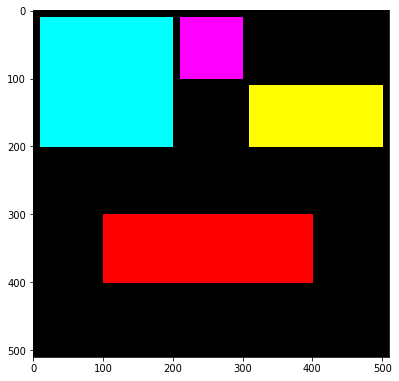

In [59]:
# Lets create our image
image_data = np.zeros((510,510,3), np.uint8)

cv2.rectangle(image_data, (10,10), (200,200), (255,255,0), -1)
cv2.rectangle(image_data, (210,10), (300,100), (255,0,255), -1)
cv2.rectangle(image_data, (310,110), (500,200), (0,255,255), -1)
cv2.rectangle(image_data, (100, 300), (400, 400), (0,0,255), -1)

cv2.imshow("Original", image_data)

In order to get the contours of an image we are going to be performing edge detection first. So, we want to work on a single channel.

Showing Image: Grayscaled


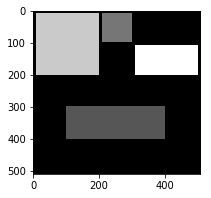

Showing Image: Red channel


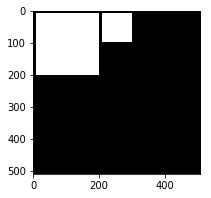

In [60]:
gray = cv2.cvtColor(image_data,cv2.COLOR_BGR2GRAY)
red = image_data[:,:,0]

cv2.imshow("Grayscaled", gray, (3,3))
cv2.imshow("Red channel", red, (3,3))

We could either choose one channel to look at (using natural images, this migh be a *"good enough"* approach. But situations like the oe in our example migh occur (some of the rectangles don't have red color, so would have lost them) so we will be using the grayscaled image from now on.

In this example, we will also perform thresholding just to simplify our edge detection parameters.

In [61]:
work_image = None

Showing Image: Image we'll be working with


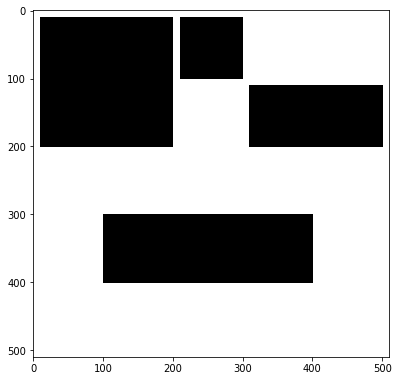

In [62]:
ret, work_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)

cv2.imshow("Image we'll be working with", work_image)

Showing Image: Canny Edges


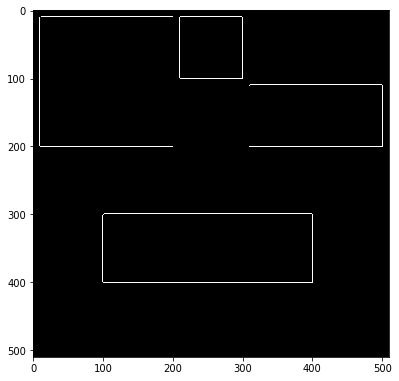

In [63]:
# Find Canny edges
edged = cv2.Canny(work_image, 30, 200)
cv2.imshow('Canny Edges', edged)

Showing Image: Canny Edges After Contouring


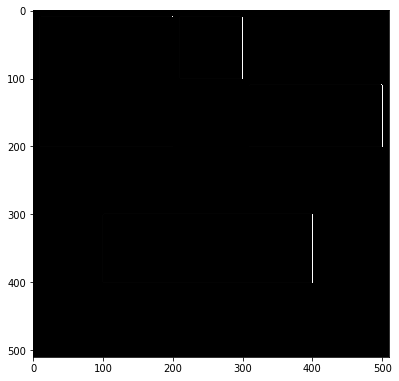

In [64]:
# we use the edges to look for contours
# take note that cv2.findContours 
# actually changes the image we pass in.
_, contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)

In [65]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 4


Showing Image: Only the first contour Contours


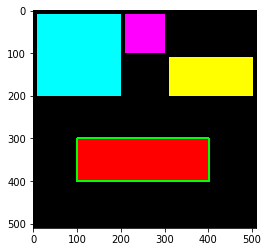

Showing Image: 2nd contour with different thickess


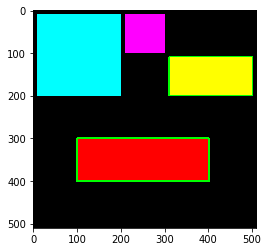

Showing Image: All Contours


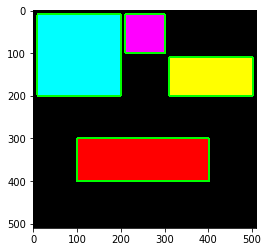

In [66]:
# Draw all contours
# Use '-1' as the 3rd parameter to draw all



cv2.drawContours(image_data, contours, 0, (0,255,0), 3)
cv2.imshow('Only the first contour Contours', image_data, (4,4))

## take note that cv2.drawContours changes the data##
## that why we are seing the 1st and 2nd contours here...
cv2.drawContours(image_data, contours, 1, (0,255,0), 2)
cv2.imshow('2nd contour with different thickess', image_data, (4,4))


cv2.drawContours(image_data, contours, -1, (0,255,0), 3)
cv2.imshow('All Contours', image_data, (4,4))

**cv2.findContours(image, Retrieval Mode, Approximation Method)**

Returns -> contours, hierarchy

**NOTE** In OpenCV 3.X, findContours returns a 3rd argument which is ret (or a boolean indicating if the function was successfully run). 

If you're using OpenCV 3.X replace line 12 with:

_, contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

The variable 'contours' are stored as a numpy array of (x,y) points that form the contour

While, 'hierarchy' describes the child-parent relationships between contours (i.e. contours within contours)



#### Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information..